In [3]:
import os
import matplotlib.pyplot as plt



from dicom_utils import read_dicom, normalize_and_convert, save_image
from patch_extraction import sliding_window

2025-01-06 11:56:32.617167: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-06 11:56:33.694948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-06 11:56:39.235662: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
# directories
input_directory = "../Sample DCMs for demo"  # Folder with DICOM files

print(os.listdir(input_directory))
output_directory = "output_pngs"  # Folder to save normalized PNGs

# Ensure output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

['075_STUDY002_SER007_CT00039.dcm', '075_STUDY002_SER007_CT00037.dcm', '058_STUDY002_SER004_CT00038.dcm', '048_STUDY001_SER001_CT00035.dcm', '086_STUDY001_SER003_CT00034.dcm', '059_STUDY002_SER004_CT00017.dcm']


Process DICOM Files

Image saved at output_pngs/075_STUDY002_SER007_CT00039.png


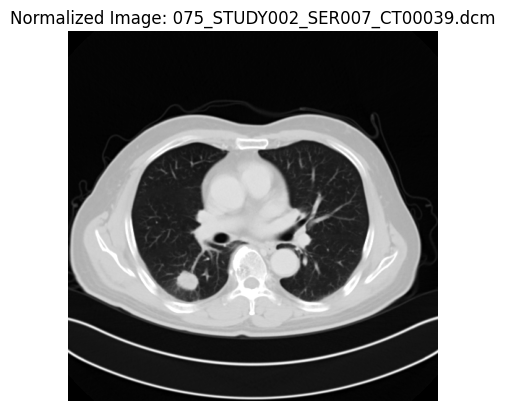

Image saved at output_pngs/075_STUDY002_SER007_CT00037.png


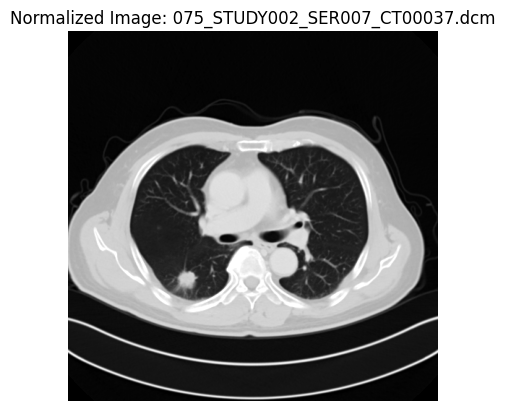

Image saved at output_pngs/058_STUDY002_SER004_CT00038.png


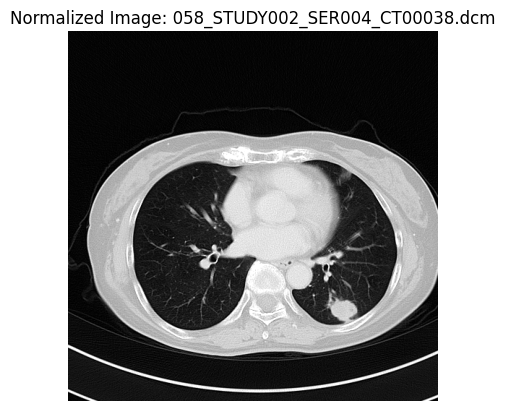

Image saved at output_pngs/048_STUDY001_SER001_CT00035.png


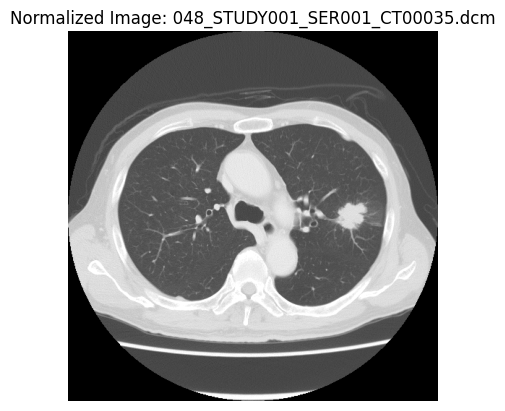

Image saved at output_pngs/086_STUDY001_SER003_CT00034.png


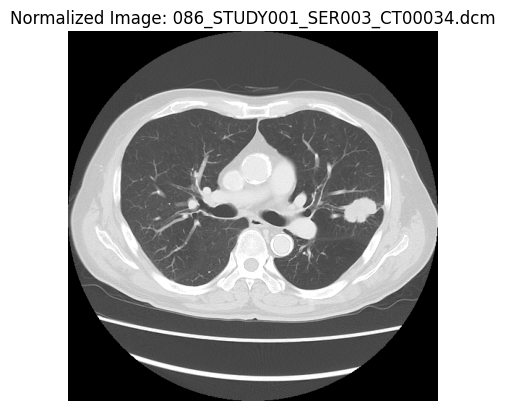

Image saved at output_pngs/059_STUDY002_SER004_CT00017.png


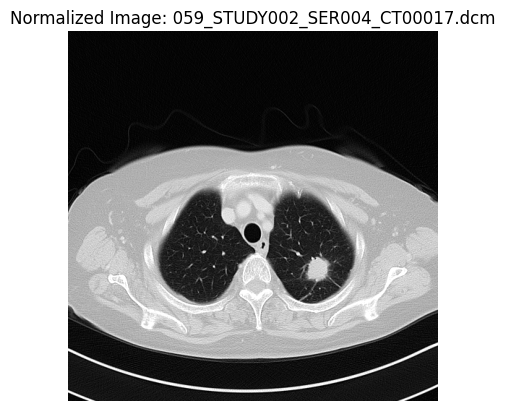

In [8]:
# Function to process DICOM and save as PNG
def process_dicom_to_png(input_dir, output_dir, window_center=-600, window_width=1800):
    for filename in os.listdir(input_dir):
        if filename.lower().endswith('.dcm'):
            file_path = os.path.join(input_dir, filename)
            try:
                # Read the DICOM file
                ds = read_dicom(file_path)
                
                # Normalize and convert to PNG
                image = normalize_and_convert(ds, window_center=window_center, window_width=window_width)
                
                # Save the normalized image as PNG
                output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.png")
                save_image(image, output_path)
                
                # Display the image
                plt.imshow(image, cmap='gray')
                plt.title(f"Normalized Image: {filename}")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Call the function
process_dicom_to_png(input_directory, output_directory)
